In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

In [2]:
actor =pd.read_csv('credits.csv')
actor

,person_id,id,name,character,role
0,60017,tm155702,Judy Garland,Dorothy Gale,ACTOR
1,53496,tm155702,Ray Bolger,Hunk / Scarecrow,ACTOR
2,79549,tm155702,Jack Haley,Hickory / Tin Man,ACTOR
3,79548,tm155702,Bert Lahr,Zeke / Cowardly Lion,ACTOR
4,60995,tm155702,Margaret Hamilton,Elmira Gulch / Wicked Witch of the West,ACTOR
...,...,...,...,...,...
66388,1224011,tm1067128,Stella Lauri,Marta,ACTOR
66389,2305342,tm1067128,Fabiola Sánchez,Claudia,ACTOR
66390,1245864,tm1067128,Ash Olivera,Nora,ACTOR
66391,2305203,tm1067128,Mariel Garcia Spooner,NaN,DIRECTOR


In [3]:
movies=pd.read_csv('titles.csv')
movies.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6
1,tm83648,Citizen Kane,MOVIE,"Newspaper magnate, Charles Foster Kane is take...",1941,PG,119,['drama'],['US'],NaN,tt0033467,8.3,433804.0,14.383,8.0
2,tm77588,Casablanca,MOVIE,"In Casablanca, Morocco in December 1941, a cyn...",1942,PG,102,"['drama', 'romance', 'war']",['US'],NaN,tt0034583,8.5,558849.0,20.087,8.2
3,tm82363,The Big Sleep,MOVIE,Private Investigator Philip Marlowe is hired b...,1946,NaN,116,"['thriller', 'crime']",['US'],NaN,tt0038355,7.9,84494.0,12.911,7.7
4,tm84701,The Maltese Falcon,MOVIE,A private detective takes on a case that invol...,1941,NaN,100,"['thriller', 'romance', 'crime']",['US'],NaN,tt0033870,8.0,156603.0,12.788,7.8


In [4]:
# There are two dataframes so we will combine them using left join concatnating both df by concat method will not give good result so we will use merge to combine both the 'DF'

In [5]:
main=movies.merge(actor,on='id',how='left')
main.head(4)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,60017.0,Judy Garland,Dorothy Gale,ACTOR
1,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,53496.0,Ray Bolger,Hunk / Scarecrow,ACTOR
2,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,79549.0,Jack Haley,Hickory / Tin Man,ACTOR
3,tm155702,The Wizard of Oz,MOVIE,Young Dorothy finds herself in a magical world...,1939,G,102,"['fantasy', 'family']",['US'],NaN,tt0032138,8.1,389774.0,41.442,7.6,79548.0,Bert Lahr,Zeke / Cowardly Lion,ACTOR


In [6]:
main.isnull().sum()


id                          0
title                       0
type                        0
description                17
release_year                0
age_certification       15804
runtime                     0
genres                      0
production_countries        0
seasons                 61778
imdb_id                  2981
imdb_score               3165
imdb_votes               3232
tmdb_popularity            33
tmdb_score                985
person_id                 174
name                      174
character                4679
role                      174
dtype: int64

In [7]:
# As you can see all columns have null values except id,title,type,release year,runtime,genres and production countries

<AxesSubplot:>

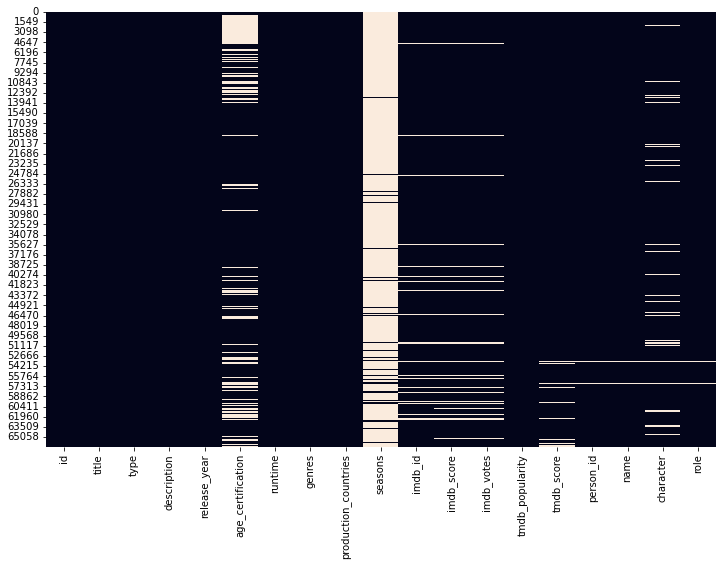

In [8]:
plt.subplots(figsize=(12,8))
sns.heatmap(main.isnull(),cbar=False)

In [9]:
main.duplicated().sum()

0

<AxesSubplot:>

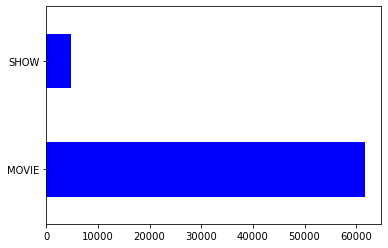

In [12]:
# Movies Vs. TV Shows
main['type'].value_counts().plot(kind='barh',color='blue')

In [13]:
main['production_countries'].unique().shape

(268,)

In [14]:
main['production_countries']=main['production_countries'].str.strip('[]')

In [15]:
main['production_countries']=main['production_countries'].replace(r'^s*$', float('NaN'), regex = True)
main.dropna(subset=['production_countries'],inplace=True)

In [16]:
# Some rows in 'production_countries' were returning empty list or empty space so i fill that space with Nan using regex and then removed nan values using dropna

In [17]:
# These are the top 20 countries which produced more content over the years some countries also collaborated together to make movies

<AxesSubplot:xlabel='Total count', ylabel='Country Abbreviation'>

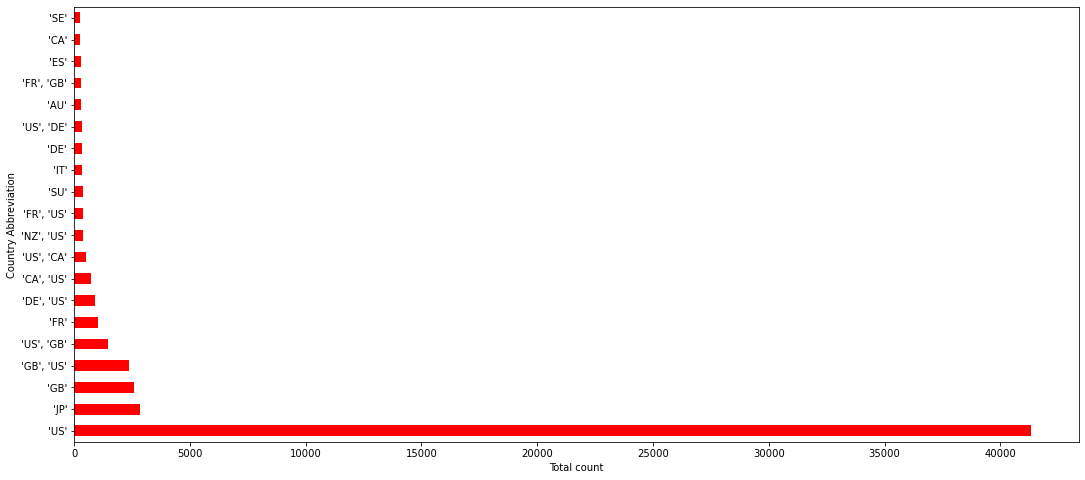

In [18]:
plt.subplots(figsize=(18,8))
plt.xlabel('Total count')
plt.ylabel('Country Abbreviation')

main['production_countries'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh',color='red')

In [20]:
# from the below scatterplot we can see HBO majorly makes only movies highest number of movies HBO made is in 2013 and highest number of tv shows were made in 2021

In [21]:
type_data=main.groupby('type')['release_year'].value_counts().sort_values().unstack().fillna(0).T.reset_index()
type_data.rename(columns={'type':'index','release_year':'Year','MOVIE':'Movie','SHOW':'Tv Show'},inplace=True)

In [22]:
type_data.rename(index={'type':'index'},inplace=True)

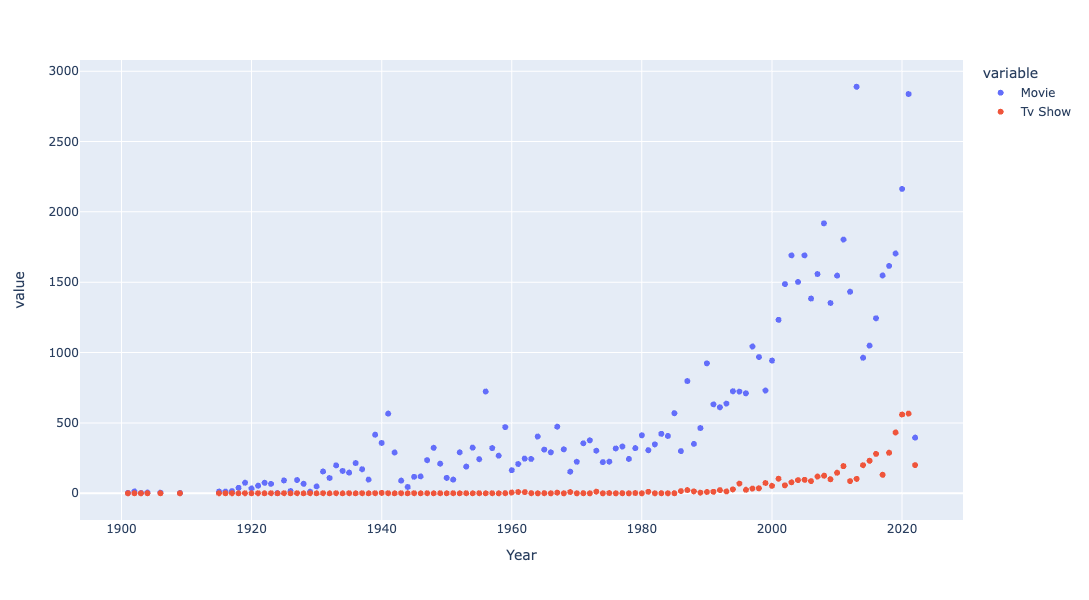

In [23]:
fig=px.scatter(type_data,x='Year',y=['Movie','Tv Show'],width=700,height=600)
fig.show()

In [24]:
# R and PG-13 certified movies are more so HBO is not for kids

<AxesSubplot:xlabel='counts', ylabel='age_certification,type'>

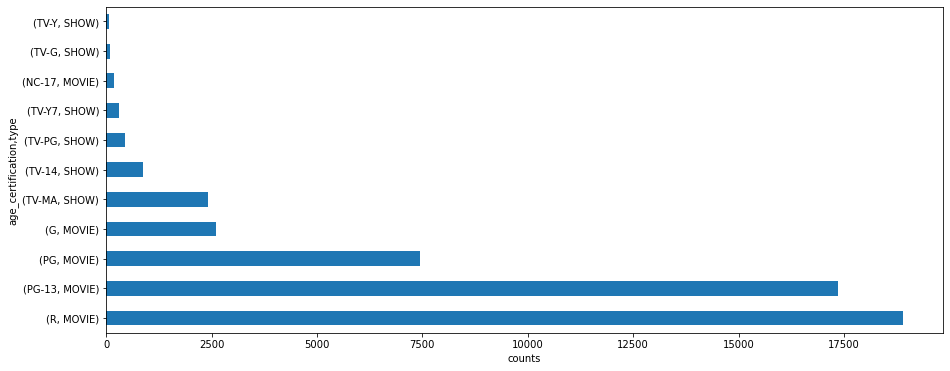

In [25]:
plt.subplots(figsize=(15,6))
plt.xlabel('counts')
main.groupby('age_certification')['type'].value_counts().sort_values(ascending=False).plot(kind='barh')

In [26]:
# Top 20 movies which got maximum imdb votes

In [30]:
main[['imdb_votes','type','title']].sort_values('imdb_votes',ascending=False).drop_duplicates().reset_index(drop=True)[:10]

,imdb_votes,type,title
0,2555504.0,MOVIE,The Dark Knight
1,2548100.0,MOVIE,The Shawshank Redemption
2,2268288.0,MOVIE,Inception
3,1983794.0,SHOW,Game of Thrones
4,1857949.0,MOVIE,The Matrix
5,1798012.0,MOVIE,The Lord of the Rings: The Fellowship of the Ring
6,1776725.0,MOVIE,The Lord of the Rings: The Return of the King
7,1604677.0,MOVIE,The Lord of the Rings: The Two Towers
8,1586065.0,MOVIE,Se7en
9,1426616.0,MOVIE,Batman Begins


In [31]:
#Top 20 tv shows which got maximum imdb votes

In [32]:
tv=main[main['type']=='SHOW']
tv[['imdb_votes','title']].sort_values('imdb_votes',ascending=False).drop_duplicates().reset_index(drop=True)[:10]

,imdb_votes,title
0,1983794.0,Game of Thrones
1,950362.0,Friends
2,782154.0,The Big Bang Theory
3,693955.0,Chernobyl
4,546443.0,True Detective
5,474807.0,Westworld
6,473951.0,Rick and Morty
7,440706.0,Band of Brothers
8,372367.0,The Sopranos
9,359621.0,South Park


In [33]:
#Top 20 shows and movies which got highest imdb score 

In [34]:
main[['imdb_score','title','type']].sort_values('imdb_score',ascending=False).drop_duplicates().reset_index(drop=True)[:20]

,imdb_score,title,type
0,9.4,Chernobyl,SHOW
1,9.4,Band of Brothers,SHOW
2,9.3,The Shawshank Redemption,MOVIE
3,9.3,Lamput,SHOW
4,9.3,The Wire,SHOW
5,9.2,Game of Thrones,SHOW
6,9.2,Emergency Contact,MOVIE
7,9.2,The Sopranos,SHOW
8,9.2,Rick and Morty,SHOW
9,9.2,Eyes on the Prize,SHOW


In [35]:
# Top 20 movies and tv shows which got highest tmdb votes these are sorted by votes not score so some got more score but they are down because they got less votes

In [36]:
main[['tmdb_popularity','title','type','tmdb_score']].sort_values(by='tmdb_popularity',ascending=False).drop_duplicates().reset_index(drop=True)[:20]

,tmdb_popularity,title,type,tmdb_score
0,4447.894,The Batman,MOVIE,7.8
1,757.816,The Baby,SHOW,8.8
2,641.541,The Matrix Resurrections,MOVIE,6.7
3,565.886,Kimi,MOVIE,6.2
4,559.090,The King's Man,MOVIE,6.9
5,527.634,Superman & Lois,SHOW,8.1
6,492.101,Game of Thrones,SHOW,8.4
7,445.399,Euphoria,SHOW,8.4
8,398.516,Free Guy,MOVIE,7.7
9,386.008,Death on the Nile,MOVIE,6.5


In [37]:
tv['seasons']=tv['seasons'].dropna().astype(int)

/var/folders/fs/ccrxxxf52md0cgbw9bch518w0000gn/T/ipykernel_10928/2193434405.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
#Top 20 shows having maximum seasons

In [40]:
tv[['seasons','title']].sort_values('seasons',ascending=False).drop_duplicates().dropna().reset_index(drop=True)[:10]

,seasons,title
0,52,Sesame Street
1,31,Top Gear
2,28,Real Sports with Bryant Gumbel
3,26,The Bachelor
4,25,South Park
5,20,Real Time with Bill Maher
6,18,The Bachelorette
7,17,Hard Knocks
8,16,Tom and Jerry
9,15,ER
